In [7]:
import pandas as pd
import matplotlib as mp

In [8]:
data = pd.read_csv('NCL2022_Heart_DS.csv')

In [550]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
1,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
2,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
4,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
5,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0


### Handling Null Values in Dataset

In [9]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Handling Duplicate values in dataset

In [11]:
data.duplicated().any()

True

In [12]:
data=data.drop_duplicates()

In [13]:
data.duplicated().any()

False

### Data Preprocessing 

In [14]:
categorical_col = []
numerical_col = []

for c in data.columns:
    if data[c].nunique() <=10:
        categorical_col.append(c)
    else:
        numerical_col.append(c)

In [15]:
categorical_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
numerical_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [17]:
data['cp'].unique()

array([2, 0, 1, 3], dtype=int64)

### Encoding Categorical Columns

##### Firstly we are removing sex and target columns from categorical_col list because these two columns has the data as 0s and 1s. So encoding is not required for them

In [18]:
categorical_col.remove('sex')
categorical_col.remove('target')


##### below code is to handle dummy variable trap, which is creating dummy columns for each categorical column

In [19]:
data = pd.get_dummies(data,columns=categorical_col,drop_first=True)

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,46,0,142,177,160,1.4,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,71,0,112,149,125,1.6,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,35,0,138,183,182,1.4,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,45,0,130,234,175,0.6,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,47,1,108,243,152,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Feature Scaling 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
st = StandardScaler()
data[numerical_col] = st.fit_transform(data[numerical_col])

In [23]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.932199,0,0.592972,-1.345134,0.456164,0.307844,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,1.835438,0,-1.117961,-1.887058,-1.074521,0.480328,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-2.149959,0,0.364848,-1.229007,1.418309,0.307844,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,-0.821493,1,-1.346085,-0.067741,0.106294,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Splitting data into Training set and Test set

In [24]:
x=data.drop('target',axis=1)
y=data['target']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
166,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
281,-1.153610,1,-0.661712,-1.499969,-0.243577,1.515232,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
272,-1.042904,0,0.364848,-0.203222,0.106294,-0.727060,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
87,1.060500,1,-0.376556,1.209652,-0.812118,0.652812,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
236,-0.489377,1,-0.148432,-0.977399,0.587366,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
y_train.head()

166    1
281    0
272    1
87     0
236    1
Name: target, dtype: int64

In [29]:
x_test.head()

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
240,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
345,0.617678,1,0.478910,0.899981,0.893503,0.135360,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
135,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
404,0.506972,1,-0.319525,-0.551602,-0.680916,0.997780,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
67,-0.489377,0,-1.232023,0.145158,0.412431,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
y_test.head()

240    0
345    0
135    0
404    0
67     1
Name: target, dtype: int64

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [33]:
pred1=LR.predict(x_test)

In [34]:
pred1

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [36]:
con_m=confusion_matrix(y_test,pred1)

<AxesSubplot:>

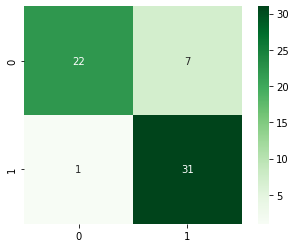

In [37]:
sb.heatmap(con_m, square=True, annot=True, cmap='Greens', fmt='d', cbar=True)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,pred1)

0.8688524590163934

## Support Vector Machine

In [40]:
from sklearn import svm

In [41]:
SVM = svm.SVC()

In [42]:
SVM.fit(x_train,y_train)

SVC()

In [43]:
pred2=SVM.predict(x_test)

In [44]:
pred2

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [45]:
con_m=confusion_matrix(y_test,pred2)

<AxesSubplot:>

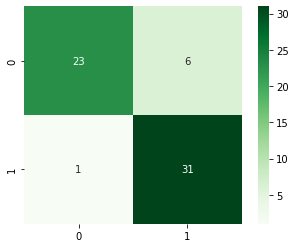

In [46]:
sb.heatmap(con_m, square=True, annot=True, cmap='Greens', fmt='d', cbar=True)

In [47]:
accuracy_score(y_test,pred2)

0.8852459016393442

### KNeighbors Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
KNN = KNeighborsClassifier()

In [50]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
pred3=KNN.predict(x_test)

In [52]:
pred3

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [53]:
con_m=confusion_matrix(y_test,pred3)

<AxesSubplot:>

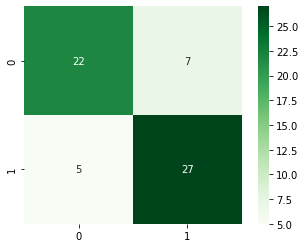

In [54]:
sb.heatmap(con_m, square=True, annot=True, cmap='Greens', fmt='d', cbar=True)

In [55]:
accuracy_score(y_test,pred3)

0.8032786885245902

In [56]:
score = []

for k in range(1,20):
    KNN= KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    pred3=KNN.predict(x_test)
    score.append(accuracy_score(y_test,pred3))

In [57]:
score

[0.6885245901639344,
 0.7213114754098361,
 0.8360655737704918,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.819672131147541,
 0.8032786885245902,
 0.8360655737704918,
 0.8032786885245902,
 0.8360655737704918,
 0.8032786885245902,
 0.8524590163934426,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.8688524590163934,
 0.8524590163934426,
 0.8524590163934426]

In [58]:
KNN = KNeighborsClassifier(n_neighbors=17)
KNN.fit(x_train,y_train)
pred3=KNN.predict(x_test)
accuracy_score(y_test,pred3)

0.8688524590163934

### Non-Linear Algorithms

In [59]:
data = pd.read_csv('NCL2022_Heart_DS.csv')

In [60]:
data=data.drop_duplicates()

In [61]:
x=data.drop('target',axis=1)
y=data['target']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
DT = DecisionTreeClassifier()

In [65]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
pred4 = DT.predict(x_test)

In [67]:
pred4

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [68]:
con_m=confusion_matrix(y_test,pred4)

<AxesSubplot:>

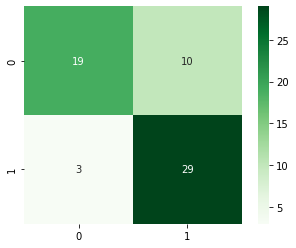

In [69]:
sb.heatmap(con_m, square=True, annot=True, cmap='Greens', fmt='d', cbar=True)

In [70]:
accuracy_score(y_test,pred4)

0.7868852459016393

### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [492]:
RF = RandomForestClassifier(n_estimators=500)

In [523]:
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [524]:
pred5 = RF.predict(x_test)

In [525]:
pred5

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [526]:
con_m=confusion_matrix(y_test,pred5)

<AxesSubplot:>

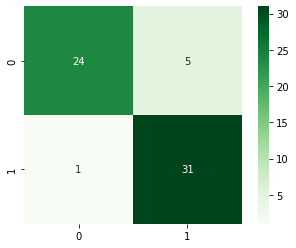

In [527]:
sb.heatmap(con_m, square=True, annot=True, cmap='Greens', fmt='d', cbar=True)

In [528]:
accuracy_score(y_test,pred5)

0.9016393442622951

### Gradient Boosting Classifier

In [529]:
from sklearn.ensemble import GradientBoostingClassifier

In [530]:
GB = GradientBoostingClassifier()

In [531]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [532]:
pred6 = GB.predict(x_test)

In [533]:
pred6

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [534]:
con_m=confusion_matrix(y_test,pred6)

<AxesSubplot:>

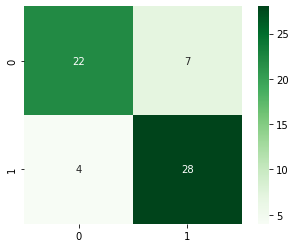

In [535]:
sb.heatmap(con_m, square=True, annot=True, cmap='Greens', fmt='d', cbar=True)

In [536]:
accuracy_score(y_test,pred6)

0.819672131147541

### Comparing all the above models

In [539]:
final_data= pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'Accuracy':
                          [accuracy_score(y_test,pred1),accuracy_score(y_test,pred2),
                          accuracy_score(y_test,pred3),accuracy_score(y_test,pred4),
                          accuracy_score(y_test,pred5),accuracy_score(y_test,pred6)]})

In [540]:
final_data

,Models,Accuracy
0,LR,0.868852
1,SVM,0.885246
2,KNN,0.868852
3,DT,0.786885
4,RF,0.901639
5,GB,0.819672


##### Graphical visualisation

In [61]:
import seaborn as sb

C:\Users\sandeepkumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

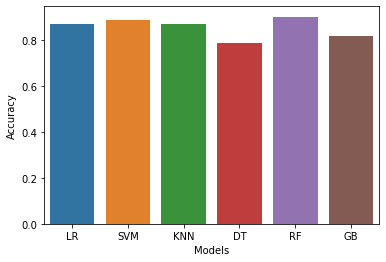

In [542]:
sb.barplot(final_data['Models'],final_data['Accuracy'])

In [543]:
X = data.drop('target',axis=1)
Y = data['target']

In [544]:
from sklearn.ensemble import RandomForestClassifier

In [545]:
RFC = RandomForestClassifier(n_estimators=200)

In [546]:
RFC.fit(X,Y)

RandomForestClassifier(n_estimators=200)

### Saving the above Model with Joblib

In [547]:
import joblib

In [548]:
joblib.dump(RFC,'NCL2022_Heart_Disease_Predictor')

['NCL2022_Heart_Disease_Predictor']

In [549]:
NCL2022_Heart_Disease_Predictor= joblib.load('NCL2022_Heart_Disease_Predictor')